<a href="https://colab.research.google.com/github/GusBarcenac/Simulacion2-Examen-1/blob/main/ejercicio16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO 16**

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10


1.Identificación de las variables: Se tendran Dos variables aleatorias independientes , simulando a las 2 personas participantes.

2.Se especifica que x1, x2 ~ U[0,30].

3.Generando x1 ~ U(0,30) &  x2 ~ U(0,30).

4.El modelo del sistema consistira en comparar el tiempo de llegada de las persona 1 y de la persona 2, si la diferencia de tiempo de las personas es menor a 
10 min (|x1 - x2|=< 10) se toma como un evento positivo.




In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def llegada():
    exito=0 
    x_1=round(random.uniform(0, 30),2) #Regresa una v.a uniforme entre 0 y 30 redondeado a 2 digitos decimales.
    x_2=round(random.uniform(0, 30),2) #simulando que es el tiempo medido en minutos con segundos.
    if abs(x_1-x_2)<=10:
        exito+=1 #Si el tiempo de espera entre las personas esta entre 0 y 10 min. entonces se toma el experimento como "exito".
    return exito

In [3]:


llegada()



1

5.Diseñe el experimento : Para estimar la probabilidad de que el tiempo de llegada entre la persona 1 y la persona 2 sea menor o igual a 10 min, ejecutamos
veces la función anterior y calculamos de manera acumulativa la probabilidad de llegada.

In [4]:
def prob_llegada(n):                    
    prob = [] # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    exito1 = 0 # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n): # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        exito1 += llegada()
        prob.append(exito1/(i+1))
    return prob

In [5]:


X = prob_llegada(1500) # Asignamos valores a n y realizamos el experimento



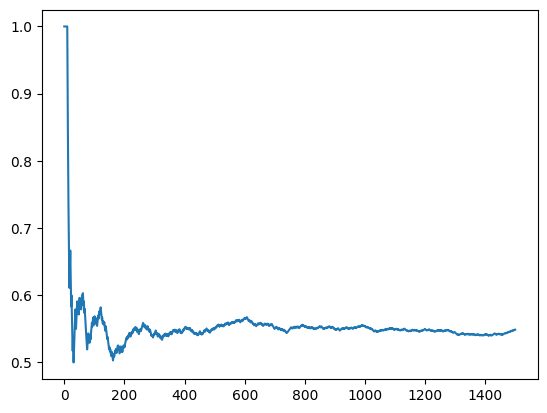

In [6]:
plt.plot(X) # La gráfica muestra que la convergencia está garantizada con 500 iteraciones. Recordamos, diferentes ejecuciones darán resultados distintos

In [7]:
print(np.mean(X), np.std(X))

0.5532488158215324 0.042968102665863574


6. Repita el experimento n veces: a traves del sig.codigo.



In [8]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_llegada(500)
        lista.append(np.mean(s))
    return lista

In [9]:
Y=modelo(120)

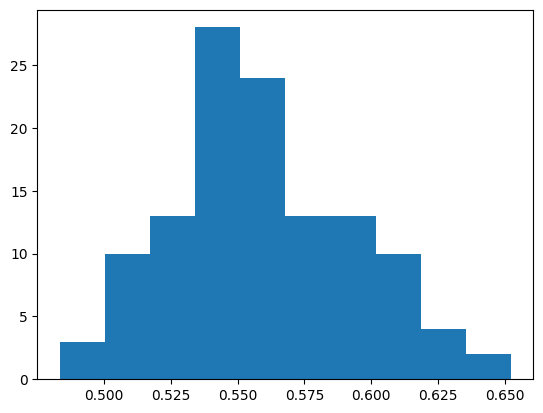

In [10]:
plt.hist(Y)
plt.show()

In [11]:


print(np.mean(Y), np.std(Y))



0.5587511561771412 0.03397396707905245


7. Intervalo de confianza

In [12]:
np.mean(Y)
y1=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50)
y2=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

if y1<np.mean(Y)<y2:
    print(y1, "<",np.mean(Y),"<",y2)
    print("Se acepta la hipotesis, confiabilidad del 95%")
else:
        print("No cumple la hipótesis nula")

0.5493340529550219 < 0.5587511561771412 < 0.5681682593992605
Se acepta la hipotesis, confiabilidad del 95%
